# **TALENTO TECH**
# **Proyecto Final**
## Grupo 2


<img src="https://cdn.simpleicons.org/python/000/fff" alt="Python" align=left width=24 height=24>

<img src="https://cdn.simpleicons.org/jupyter/000/fff" alt="jupyter" align=left width=24 height=24>
---

- Monica ...
- Juan Pablo ....
- Juan Pablo ....
- Hildebrando Vargas
- Jonathan Gutierrez
- Mary Luz Ceballos


## Tareas
1. Cargar los Datos
2. Explore y visualice los datos para obtener información.
4. Prepare los datos para los algoritmos de machine learning.
3. Generación de Estadísticas Descriptivas
4. Visualización de datos utilizando gráficos de barras, histogramas y gráficos de dispersión
5. Identificación y manejo de valores atípicos y tendencias en los datos
6. Uso de técnicas como imputación de la media, mediana y regresión para completar datos faltantes.
7. Eliminación de registros con datos faltantes o imputación de valores categóricos.
8. Aplicación de técnicas de One-hot encoding, Label encoding, y Ordinal encoding.
9. Cálculo y visualización de matrices de correlación.
10. Aplicación de PCA para reducir la dimensionalidad de datasets
11. Seleccione un modelo y entrénelo.
12. Ajusta tu modelo.
13. Presente su solución.
14. Inicie, supervise y mantenga su sistema.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
!pip install sodapy

In [5]:
from sodapy import Socrata

In [6]:
client = Socrata("www.datos.gov.co", None)

* Estado de la prestación del servicio de energía en Zonas No Interconectadas\
[enlace](https://www.datos.gov.co/Minas-y-Energ-a/Estado-de-la-prestaci-n-del-servicio-de-energ-a-en/3ebi-d83g/about_data)

In [7]:
results1 = client.get("3ebi-d83g", limit=5000)

In [8]:
datos1 = pd.DataFrame.from_records(results1)
datos1.head()

,id_dpto,dpto,id_mpio,mpio,id_localidad,localidad,anio,mes,energia_activa,energia_reactiva,potencia_maxima,dia_demanda_maxima,fecha_demanda_maxima,prom_diario_horas
0,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,05,132215,41907,286.4,Jueves,2024-05-23T18:00:00.000,24
1,91,AMAZONAS,91798,TARAPACA (ANM),91798000,TARAPACA (TARAPACA (ANM) - AMAZONAS),2024,05,28132,12662,102.6,Viernes,2024-05-03T18:30:00.000,10.16
2,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873010,LA PLAYA MURRI (VIGÍA DEL FUERTE - ANTIOQUIA),2024,05,2686,1110,27.46,Martes,2024-05-21T19:45:00.000,4.19
3,88,ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,05,1331271,284638,2190.28,Viernes,2024-05-10T15:00:00.000,23.59
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,13001007,ISLA FUERTE (CARTAGENA DE INDIAS - BOLÍVAR),2024,05,64368,30561,247.59,Sábado,2024-05-18T22:00:00.000,10.9


In [9]:
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_dpto               4273 non-null   object
 1   dpto                  4273 non-null   object
 2   id_mpio               4273 non-null   object
 3   mpio                  4273 non-null   object
 4   id_localidad          4273 non-null   object
 5   localidad             4273 non-null   object
 6   anio                  4273 non-null   object
 7   mes                   4273 non-null   object
 8   energia_activa        4273 non-null   object
 9   energia_reactiva      4273 non-null   object
 10  potencia_maxima       4273 non-null   object
 11  dia_demanda_maxima    4272 non-null   object
 12  fecha_demanda_maxima  4273 non-null   object
 13  prom_diario_horas     4273 non-null   object
dtypes: object(14)
memory usage: 467.5+ KB


In [10]:
df1 = pd.DataFrame(
    {'Municipio': datos1['mpio'],
     #'departamento': datos1['dpto'],
     'anio': datos1['anio'],
     'potencia_m': datos1['potencia_maxima'],
     'prom_diaria': datos1['prom_diario_horas'],
     'energia_activa': datos1['energia_activa'],
     'energia_reactiva': datos1['energia_reactiva']
    }
)

In [11]:
df1.shape

(4273, 6)

In [12]:
df1.isnull().sum()

Municipio           0
anio                0
potencia_m          0
prom_diaria         0
energia_activa      0
energia_reactiva    0
dtype: int64

In [13]:
df1.dtypes

Municipio           object
anio                object
potencia_m          object
prom_diaria         object
energia_activa      object
energia_reactiva    object
dtype: object

In [14]:
df1['potencia_m'] = pd.to_numeric(df1['potencia_m'], errors='coerce')
df1['prom_diaria'] = pd.to_numeric(df1['prom_diaria'], errors='coerce')
df1['energia_activa'] = pd.to_numeric(df1['energia_activa'], errors='coerce')
df1['energia_reactiva'] = pd.to_numeric(df1['energia_reactiva'], errors='coerce')
df1['anio'] = pd.to_numeric(df1['anio'], errors='coerce')
df1

,Municipio,anio,potencia_m,prom_diaria,energia_activa,energia_reactiva
0,PUERTO NARIÑO,2024,286.40,24.00,132215,41907.0
1,TARAPACA (ANM),2024,102.60,10.16,28132,12662.0
2,VIGÍA DEL FUERTE,2024,27.46,4.19,2686,1110.0
3,PROVIDENCIA,2024,2190.28,23.59,1331271,284638.0
4,CARTAGENA DE INDIAS,2024,247.59,10.90,64368,30561.0
...,...,...,...,...,...,...
4268,BUENAVENTURA,2024,31.23,10.05,7610,3285.0
4269,CARURÚ,2024,87.82,16.39,31775,7881.0
4270,MITÚ,2024,3236.71,23.56,1590470,387197.0
4271,TARAIRA,2024,136.84,13.01,39226,10719.0


### Escaler

In [15]:
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

<Axes: >

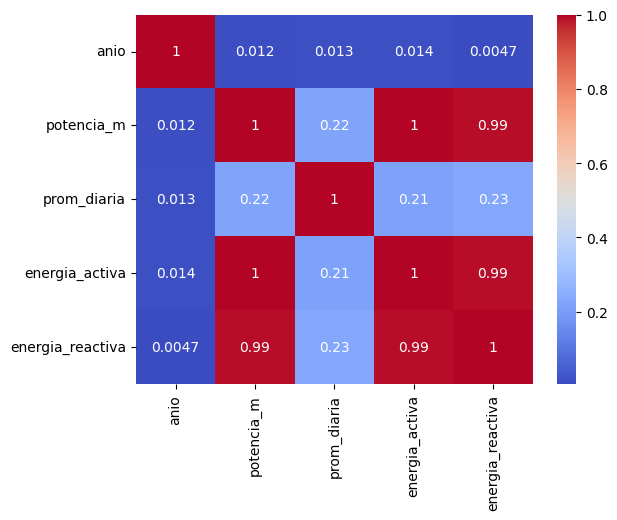

In [16]:
correlacion1 = df1[['anio',	'potencia_m',  'prom_diaria', 'energia_activa',	'energia_reactiva']].corr()

sns.heatmap(correlacion1, annot=True, cmap='coolwarm')

* our world in data energy
[vínculo](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv)




In [16]:
datos2 = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/refs/heads/master/owid-energy-data.csv')
datos2.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [17]:
datacolombia = datos2[datos2['country'] == 'Colombia']
datacolombia.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
4506,Colombia,1900,COL,4034733.0,4.353822e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4507,Colombia,1901,COL,4112556.0,4.413478e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4508,Colombia,1902,COL,4194368.0,4.486636e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4509,Colombia,1903,COL,4280293.0,4.548537e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4510,Colombia,1904,COL,4367979.0,4.620044e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
datacolombia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 4506 to 4629
Columns: 130 entries, country to wind_share_energy
dtypes: float64(127), int64(1), object(2)
memory usage: 126.9+ KB


In [19]:
df2 = pd.DataFrame(
    {'anio': datacolombia['year'],
     'cons_bio_per': datacolombia['biofuel_elec_per_capita'],
     'cons_carb_per': datacolombia['coal_elec_per_capita'],
     'cons_gas_per': datacolombia['gas_elec_per_capita'],
     'cons_conb_per': datacolombia['oil_elec_per_capita'],
     'cons_solar_per': datacolombia['solar_energy_per_capita'],
     'cons_wind_per': datacolombia['wind_energy_per_capita'],
     'cons_hydro_per': datacolombia['hydro_elec_per_capita'],
     'cons_nuclear_per': datacolombia['nuclear_elec_per_capita'],
     'cons_other_per': datacolombia['other_renewables_elec_per_capita'],
     'cons_total_per': datacolombia['electricity_demand_per_capita']
    }
)
df2

,anio,cons_bio_per,cons_carb_per,cons_gas_per,cons_conb_per,cons_solar_per,cons_wind_per,cons_hydro_per,cons_nuclear_per,cons_other_per,cons_total_per
4506,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4507,1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4508,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4509,1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4510,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4625,2019,31.283,161.993,262.217,54.795,6.936,3.326,1055.643,0.0,31.283,1575.893
4626,2020,42.214,183.976,298.249,52.032,9.839,0.522,951.097,0.0,42.214,1552.110
4627,2021,43.481,87.351,267.099,54.934,16.407,3.071,1178.262,0.0,43.481,1641.026
4628,2022,42.025,84.821,323.090,53.013,25.260,3.763,1132.166,0.0,42.025,1650.922


In [20]:
df2.shape

(124, 11)

In [21]:
df2.dtypes

,0
anio,int64
cons_bio_per,float64
cons_carb_per,float64
cons_gas_per,float64
cons_conb_per,float64
cons_solar_per,float64
cons_wind_per,float64
cons_hydro_per,float64
cons_nuclear_per,float64
cons_other_per,float64


In [22]:
df2.isnull().sum()

,0
anio,0
cons_bio_per,100
cons_carb_per,100
cons_gas_per,100
cons_conb_per,100
cons_solar_per,90
cons_wind_per,90
cons_hydro_per,65
cons_nuclear_per,65
cons_other_per,74


In [23]:
df2['cons_bio_per'].fillna(df2['cons_bio_per'].mean(), inplace=True)
df2['cons_carb_per'].fillna(df2['cons_carb_per'].mean(), inplace=True)
df2['cons_gas_per'].fillna(df2['cons_gas_per'].mean(), inplace=True)
df2['cons_conb_per'].fillna(df2['cons_conb_per'].mean(), inplace=True)
df2['cons_hydro_per'].fillna(df2['cons_hydro_per'].mean(), inplace=True)
df2['cons_solar_per'].fillna(df2['cons_solar_per'].mean(), inplace=True)
df2['cons_wind_per'].fillna(df2['cons_wind_per'].mean(), inplace=True)
df2['cons_nuclear_per'].fillna(df2['cons_nuclear_per'].mean(), inplace=True)
df2['cons_other_per'].fillna(df2['cons_other_per'].mean(), inplace=True)
df2['cons_total_per'].fillna(df2['cons_total_per'].mean(), inplace=True)

<ipython-input-23-cdae66d76579>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['cons_bio_per'].fillna(df2['cons_bio_per'].mean(), inplace=True)
<ipython-input-23-cdae66d76579>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [24]:
df2.isnull().sum()

,0
anio,0
cons_bio_per,0
cons_carb_per,0
cons_gas_per,0
cons_conb_per,0
cons_solar_per,0
cons_wind_per,0
cons_hydro_per,0
cons_nuclear_per,0
cons_other_per,0


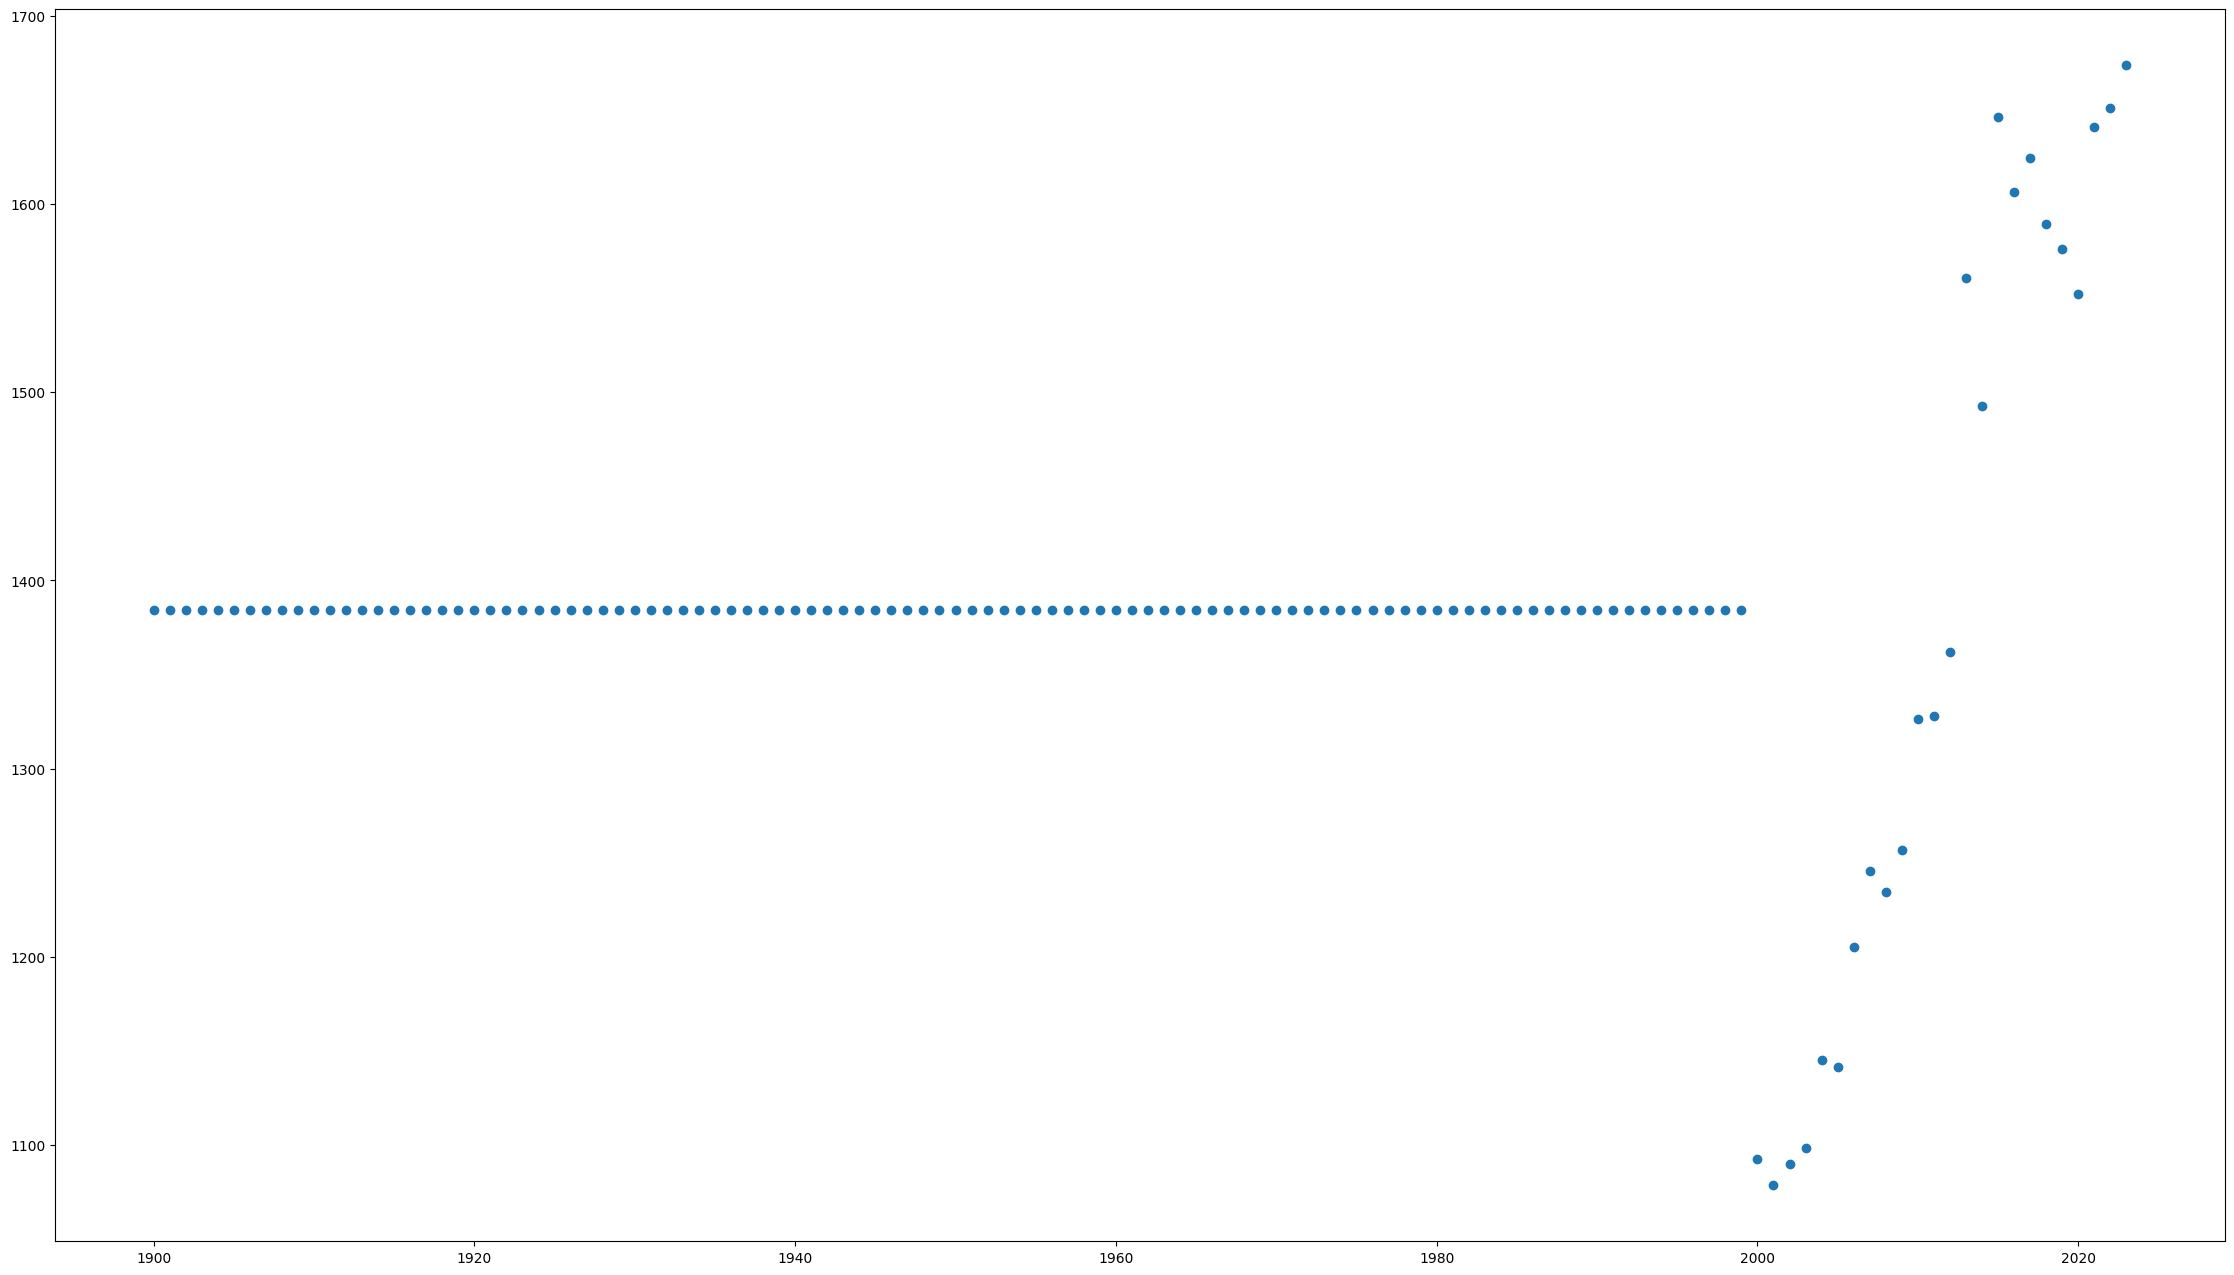

In [25]:
plt.figure(figsize=(28, 16))
plt.scatter(x='anio', y='cons_total_per', data=df2)

In [26]:
df_escalado2 = MinMaxScaler().fit_transform(df2)
df_escalado2

df2['cons_nuclear_per']

,cons_nuclear_per
4506,0.0
4507,0.0
4508,0.0
4509,0.0
4510,0.0
...,...
4625,0.0
4626,0.0
4627,0.0
4628,0.0


* Meta FNCER: Incorporar en la matriz energética nueva capacidad instalada a partir de Fuentes No Convencionales de Energía Renovable - FNCER\
[vínculo](https://www.datos.gov.co/Minas-y-Energ-a/Meta-FNCER-Incorporar-en-la-matriz-energ-tica-nuev/vy9n-w6hc/about_data)

<Axes: >

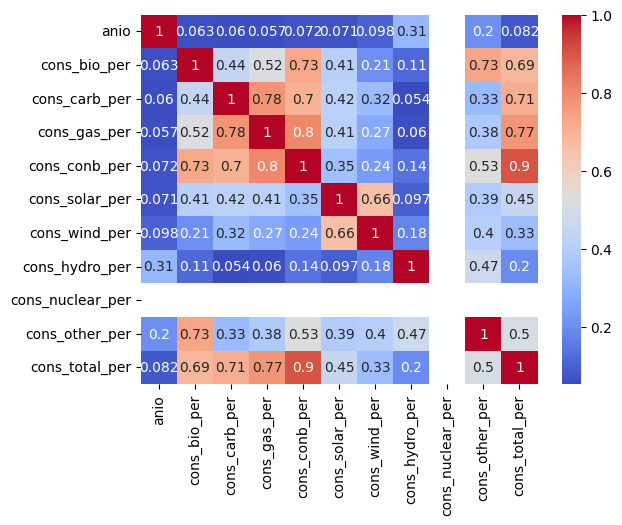

In [27]:
correlacion2 = df2[['anio', 'cons_bio_per',	'cons_carb_per', 'cons_gas_per', 'cons_conb_per', 'cons_solar_per',	'cons_wind_per', 'cons_hydro_per', 'cons_nuclear_per',	'cons_other_per', 'cons_total_per']].corr()

sns.heatmap(correlacion2, annot=True, cmap='coolwarm')

In [17]:
results3 = client.get("vy9n-w6hc", limit=3000)

datos3 = pd.DataFrame.from_records(results3)
datos3.head()

,proyecto,tipo,capacidad,departamento,municipio,codigo_departamento,codigo_municipio,fecha_estimada_fpo,energia_kwh_d_a,usuarios,inversi_n_estimada_cop,empleos_estimados,emisiones_co2_ton_a_o
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.8,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.0,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.0,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032


In [18]:
datos3['tipo'].describe()

count       158
unique        2
top       Solar
freq        145
Name: tipo, dtype: object

In [19]:
datos3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   proyecto                158 non-null    object
 1   tipo                    158 non-null    object
 2   capacidad               158 non-null    object
 3   departamento            158 non-null    object
 4   municipio               158 non-null    object
 5   codigo_departamento     158 non-null    object
 6   codigo_municipio        158 non-null    object
 7   fecha_estimada_fpo      158 non-null    object
 8   energia_kwh_d_a         158 non-null    object
 9   usuarios                158 non-null    object
 10  inversi_n_estimada_cop  158 non-null    object
 11  empleos_estimados       158 non-null    object
 12  emisiones_co2_ton_a_o   158 non-null    object
dtypes: object(13)
memory usage: 16.2+ KB


# 1) ¿Qué municipios son más aptos para desarrollar un proyecto de energías renovables?
# 2)  Cual es la probabilidad de que un municipio de colombia se desarrolle un proyectoe energia renovable?

In [20]:
df3 = pd.DataFrame(
    {'Municipio': datos3['municipio'],
     'Departamento': datos3['departamento'],
     'Tipo': datos3['tipo'],
     'Usuarios': datos3['usuarios'],
     'Capacidad_instalada': datos3['energia_kwh_d_a'],
     'Energía_p': datos3['energia_kwh_d_a'],
     'Energía_no_renovable': datos3['emisiones_co2_ton_a_o']

    }
)


In [21]:
df3.shape

(158, 7)

In [22]:
df3.isnull().sum()

Municipio               0
Departamento            0
Tipo                    0
Usuarios                0
Capacidad_instalada     0
Energía_p               0
Energía_no_renovable    0
dtype: int64

In [23]:
df3.dtypes

Municipio               object
Departamento            object
Tipo                    object
Usuarios                object
Capacidad_instalada     object
Energía_p               object
Energía_no_renovable    object
dtype: object

In [24]:
for col in ['Usuarios', 'Capacidad_instalada', 'Energía_p', 'Energía_no_renovable']:
    df3[col] = pd.to_numeric(df3[col], errors='coerce')
df3

,Municipio,Departamento,Tipo,Usuarios,Capacidad_instalada,Energía_p,Energía_no_renovable
0,URIBIA,LA GUAJIRA,Eólico,30665,176832,176832,51635
1,YUMBO,VALLE DEL CAUCA,Solar,8157,47040,47040,13736
2,SANTA ROSA,BOLÍVAR,Solar,6709,38688,38688,11297
3,EL PASO,CESAR,Solar,55769,321600,321600,93907
4,CASTILLA LA NUEVA,META,Solar,16647,96000,96000,28032
...,...,...,...,...,...,...,...
153,"""""",VALLE DEL CAUCA,Solar,4944,28512,28512,8326
154,"""""",VALLE DEL CAUCA,Solar,3296,19008,19008,5550
155,BARRANCABERMEJA,SANTANDER,Solar,17480,100800,100800,29434
156,VILLAVICENCIO,META,Solar,1582,9120,9120,2663


In [25]:
df3.dtypes

Municipio               object
Departamento            object
Tipo                    object
Usuarios                 int64
Capacidad_instalada      int64
Energía_p                int64
Energía_no_renovable     int64
dtype: object

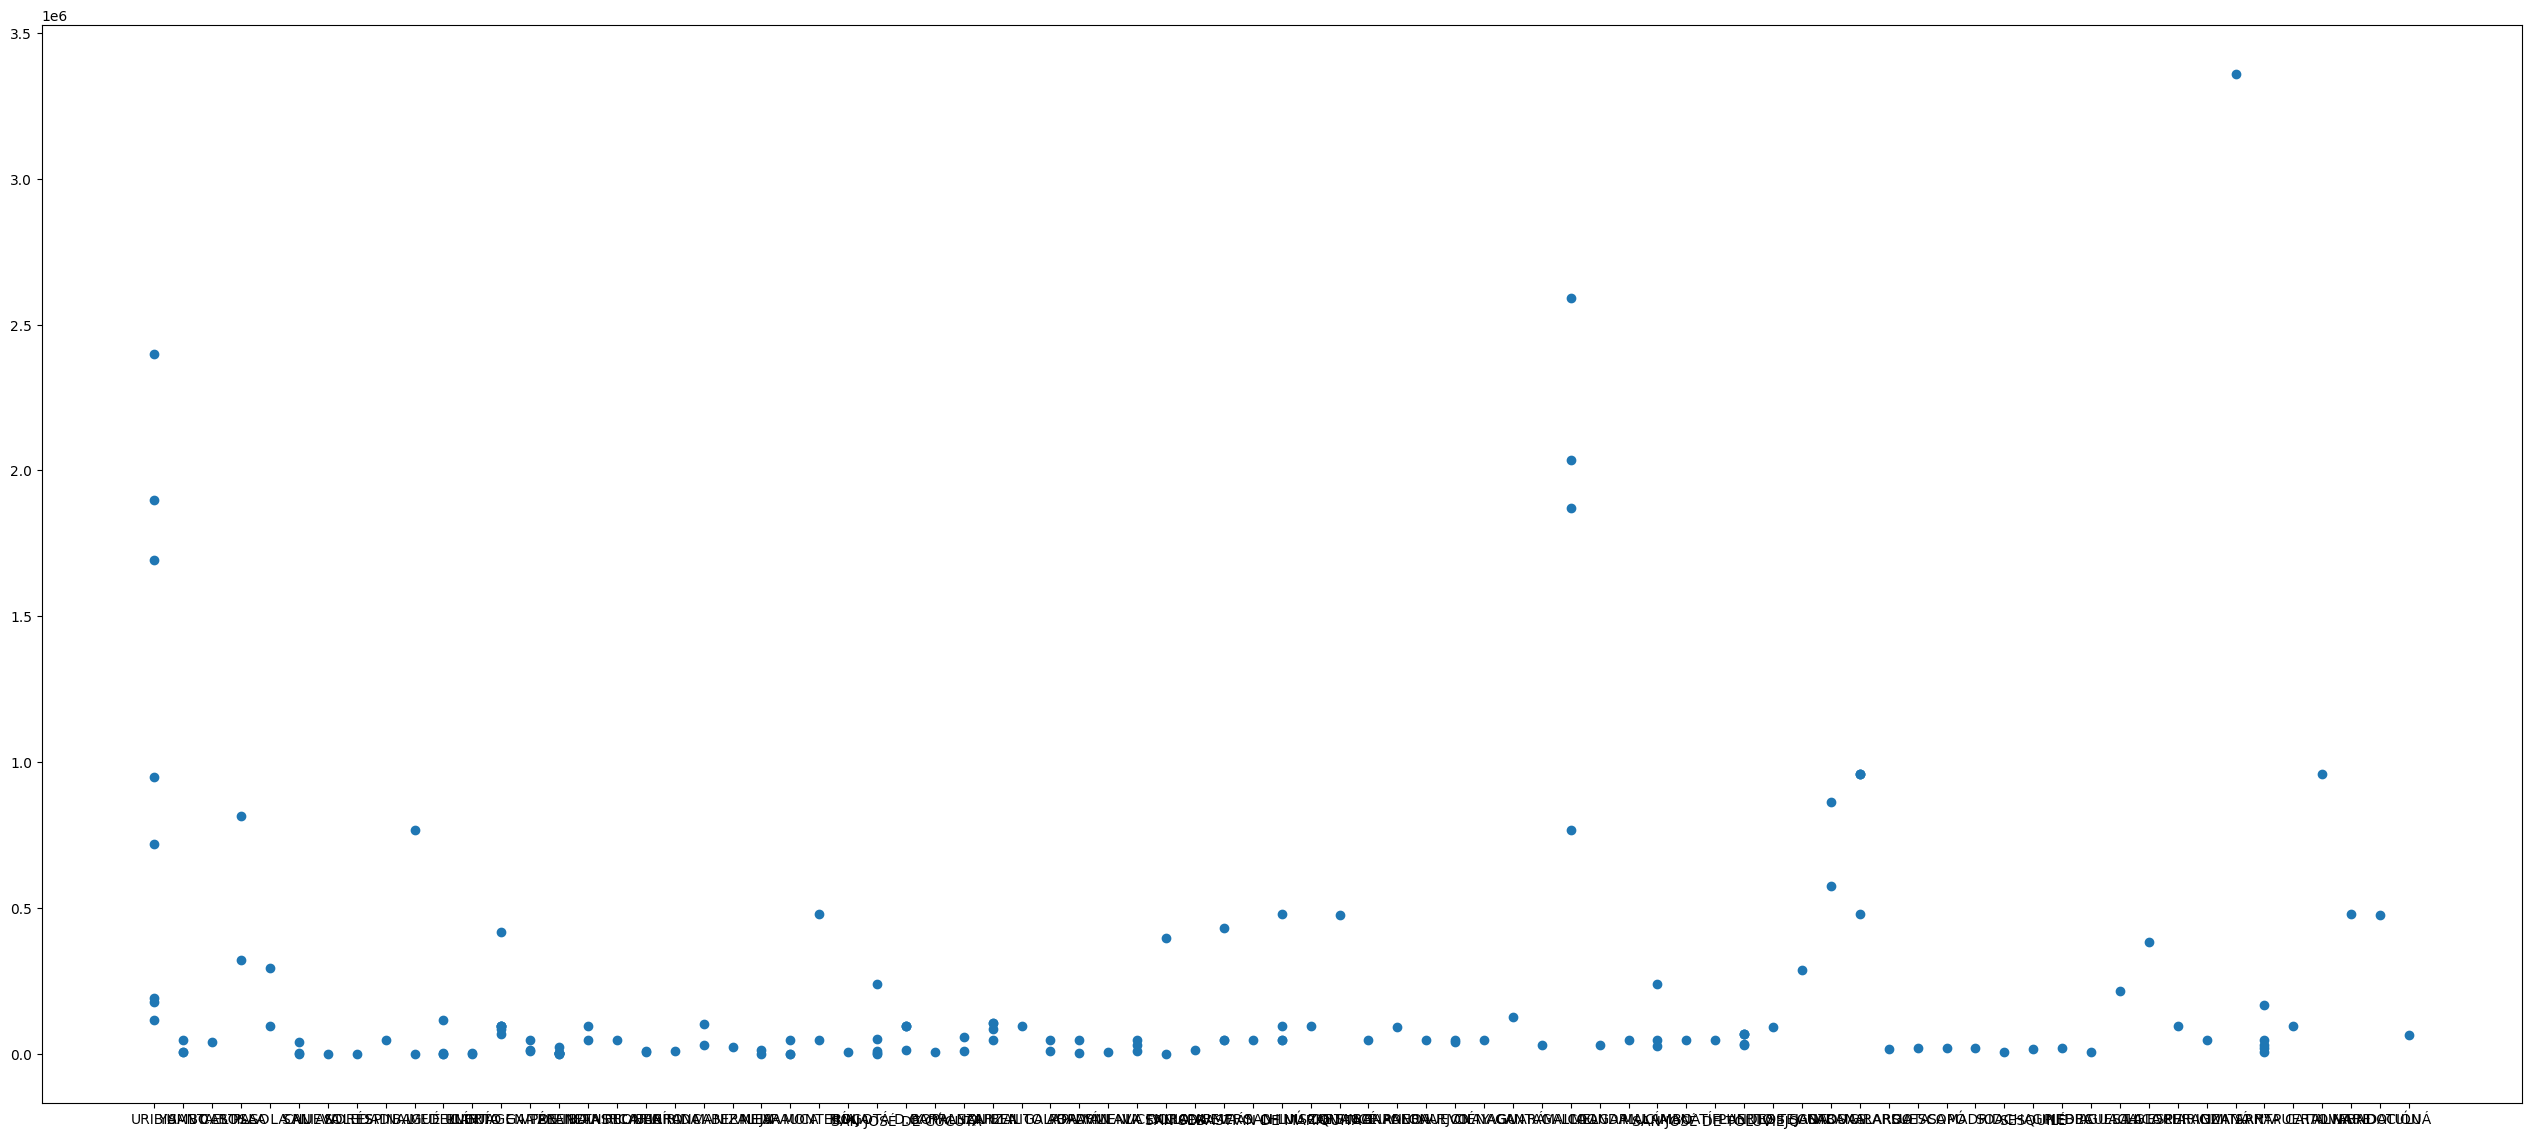

In [26]:
plt.figure(figsize=(32, 14))
plt.scatter(x='Municipio', y='Capacidad_instalada', data=df3)
#plt.xticks(rotation=65)

<Axes: >

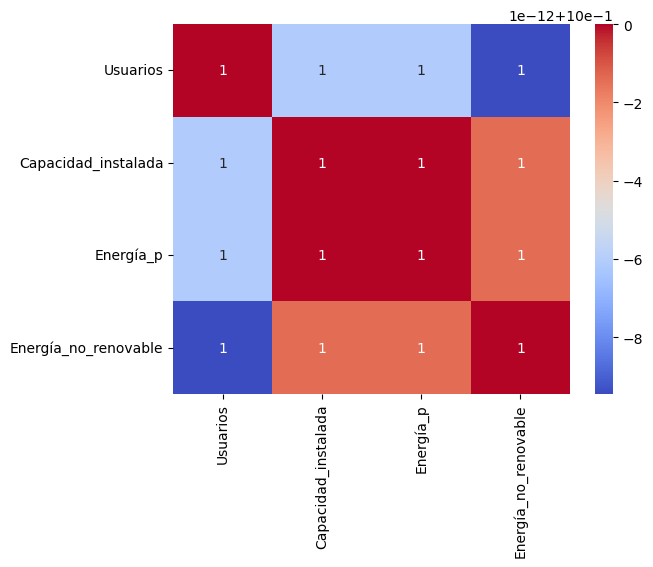

In [27]:
#correlcion
correlacion3 = df3[[ 'Usuarios', 'Capacidad_instalada',	'Energía_p', 'Energía_no_renovable']].corr()
sns.heatmap(correlacion3, annot=True, cmap='coolwarm')

In [28]:
# Unir df1 y df3
df_unificado = pd.merge(df1, df3, on='Municipio', how='left')
df_unificado.fillna(0, inplace=True)
df_unificado

,Municipio,anio,potencia_m,prom_diaria,energia_activa,energia_reactiva,Departamento,Tipo,Usuarios,Capacidad_instalada,Energía_p,Energía_no_renovable
0,PUERTO NARIÑO,2024,286.40,24.00,132215,41907.0,0,0,0.0,0.0,0.0,0.0
1,TARAPACA (ANM),2024,102.60,10.16,28132,12662.0,0,0,0.0,0.0,0.0,0.0
2,VIGÍA DEL FUERTE,2024,27.46,4.19,2686,1110.0,0,0,0.0,0.0,0.0,0.0
3,PROVIDENCIA,2024,2190.28,23.59,1331271,284638.0,0,0,0.0,0.0,0.0,0.0
4,CARTAGENA DE INDIAS,2024,247.59,10.90,64368,30561.0,BOLÍVAR,Solar,2497.0,14400.0,14400.0,4205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4996,BUENAVENTURA,2024,31.23,10.05,7610,3285.0,0,0,0.0,0.0,0.0,0.0
4997,CARURÚ,2024,87.82,16.39,31775,7881.0,0,0,0.0,0.0,0.0,0.0
4998,MITÚ,2024,3236.71,23.56,1590470,387197.0,0,0,0.0,0.0,0.0,0.0
4999,TARAIRA,2024,136.84,13.01,39226,10719.0,0,0,0.0,0.0,0.0,0.0


In [29]:
#ConVErtir a numerico
if 'Tipo' in df_unificado.columns:
    df_unificado = pd.get_dummies(df_unificado, columns=['Tipo'], dtype=float)
df_unificado

,Municipio,anio,potencia_m,prom_diaria,energia_activa,energia_reactiva,Departamento,Usuarios,Capacidad_instalada,Energía_p,Energía_no_renovable,Tipo_0,Tipo_Eólico,Tipo_Solar
0,PUERTO NARIÑO,2024,286.40,24.00,132215,41907.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,TARAPACA (ANM),2024,102.60,10.16,28132,12662.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,VIGÍA DEL FUERTE,2024,27.46,4.19,2686,1110.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,PROVIDENCIA,2024,2190.28,23.59,1331271,284638.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,CARTAGENA DE INDIAS,2024,247.59,10.90,64368,30561.0,BOLÍVAR,2497.0,14400.0,14400.0,4205.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,BUENAVENTURA,2024,31.23,10.05,7610,3285.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4997,CARURÚ,2024,87.82,16.39,31775,7881.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4998,MITÚ,2024,3236.71,23.56,1590470,387197.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4999,TARAIRA,2024,136.84,13.01,39226,10719.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
# escaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_features = ['potencia_m', 'prom_diaria', 'energia_activa', 'energia_reactiva', 'Usuarios', 'Capacidad_instalada', 'Energía_p', 'Energía_no_renovable']


scaler = MinMaxScaler()

df_unificado[numerical_features] = scaler.fit_transform(df_unificado[numerical_features])



In [31]:
df_unificado

,Municipio,anio,potencia_m,prom_diaria,energia_activa,energia_reactiva,Departamento,Usuarios,Capacidad_instalada,Energía_p,Energía_no_renovable,Tipo_0,Tipo_Eólico,Tipo_Solar
0,PUERTO NARIÑO,2024,0.008395,0.047244,0.006412,0.007710,0,0.000,0.000,0.000,0.000,1.0,0.0,0.0
1,TARAPACA (ANM),2024,0.003008,0.020000,0.001364,0.002330,0,0.000,0.000,0.000,0.000,1.0,0.0,0.0
2,VIGÍA DEL FUERTE,2024,0.000805,0.008248,0.000130,0.000204,0,0.000,0.000,0.000,0.000,1.0,0.0,0.0
3,PROVIDENCIA,2024,0.064205,0.046437,0.064559,0.052369,0,0.000,0.000,0.000,0.000,1.0,0.0,0.0
4,CARTAGENA DE INDIAS,2024,0.007258,0.021457,0.003121,0.005623,BOLÍVAR,0.006,0.006,0.006,0.006,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,BUENAVENTURA,2024,0.000915,0.019783,0.000369,0.000604,0,0.000,0.000,0.000,0.000,1.0,0.0,0.0
4997,CARURÚ,2024,0.002574,0.032264,0.001541,0.001450,0,0.000,0.000,0.000,0.000,1.0,0.0,0.0
4998,MITÚ,2024,0.094880,0.046378,0.077129,0.071239,0,0.000,0.000,0.000,0.000,1.0,0.0,0.0
4999,TARAIRA,2024,0.004011,0.025610,0.001902,0.001972,0,0.000,0.000,0.000,0.000,1.0,0.0,0.0


In [33]:
# Crear una nueva variable que represente la energía total generada
df_unificado['energia_total'] = df_unificado['energia_activa'] + df_unificado['energia_reactiva']


In [34]:
# Crear una nueva variable que represente la energía total generada
df_unificado['energia_total'] = df_unificado['energia_activa'] + df_unificado['energia_reactiva']

In [35]:
# Crear una variable que represente la eficiencia de la generación
df_unificado['eficiencia_generacion'] = df_unificado['energia_total'] / df_unificado['Capacidad_instalada']


In [36]:
# Crear una variable que represente la generación por usuario
df_unificado['generacion_usuario'] = df_unificado['energia_total'] / df_unificado['Usuarios']


In [37]:
# Crear una variable que represente la generación promedio por municipio
df_unificado['generacion_promedio_municipio'] = df_unificado.groupby('Municipio')['energia_total'].transform('mean')

# Crear una variable que represente la generación total anual por departamento
df_unificado['generacion_anual_departamento'] = df_unificado.groupby(['Departamento', 'anio'])['energia_total'].transform('sum')

In [32]:
df_unificado

,Municipio,anio,potencia_m,prom_diaria,energia_activa,energia_reactiva,Departamento,Usuarios,Capacidad_instalada,Energía_p,Energía_no_renovable,Tipo_0,Tipo_Eólico,Tipo_Solar
0,PUERTO NARIÑO,2024,0.008395,0.047244,0.006412,0.007710,0,0.000,0.000,0.000,0.000,1.0,0.0,0.0
1,TARAPACA (ANM),2024,0.003008,0.020000,0.001364,0.002330,0,0.000,0.000,0.000,0.000,1.0,0.0,0.0
2,VIGÍA DEL FUERTE,2024,0.000805,0.008248,0.000130,0.000204,0,0.000,0.000,0.000,0.000,1.0,0.0,0.0
3,PROVIDENCIA,2024,0.064205,0.046437,0.064559,0.052369,0,0.000,0.000,0.000,0.000,1.0,0.0,0.0
4,CARTAGENA DE INDIAS,2024,0.007258,0.021457,0.003121,0.005623,BOLÍVAR,0.006,0.006,0.006,0.006,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,BUENAVENTURA,2024,0.000915,0.019783,0.000369,0.000604,0,0.000,0.000,0.000,0.000,1.0,0.0,0.0
4997,CARURÚ,2024,0.002574,0.032264,0.001541,0.001450,0,0.000,0.000,0.000,0.000,1.0,0.0,0.0
4998,MITÚ,2024,0.094880,0.046378,0.077129,0.071239,0,0.000,0.000,0.000,0.000,1.0,0.0,0.0
4999,TARAIRA,2024,0.004011,0.025610,0.001902,0.001972,0,0.000,0.000,0.000,0.000,1.0,0.0,0.0


In [2]:
# Tipo vs potencia_m

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_unificado['Tipo_0'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_unificado, x='potencia_m', y='Tipo_0', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

NameError: name 'df_unificado' is not defined

<Axes: >

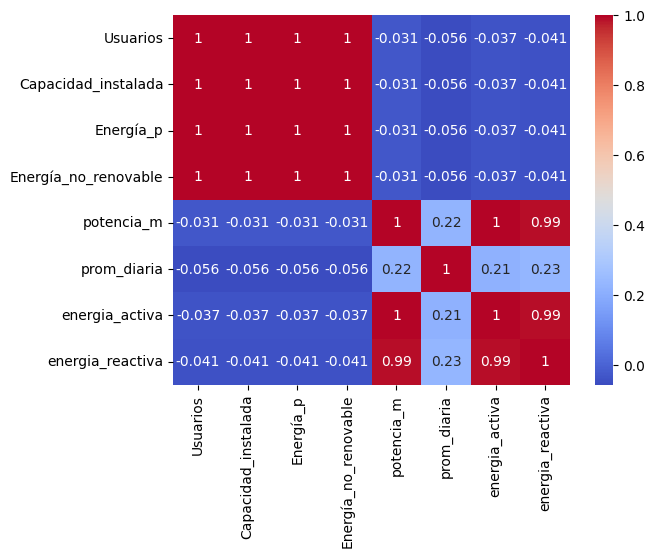

In [33]:
correlacionf = df_unificado[[ 'Usuarios', 'Capacidad_instalada',	'Energía_p', 'Energía_no_renovable',	'potencia_m',	'prom_diaria',	'energia_activa',	'energia_reactiva']].corr()
sns.heatmap(correlacionf, annot=True, cmap='coolwarm')

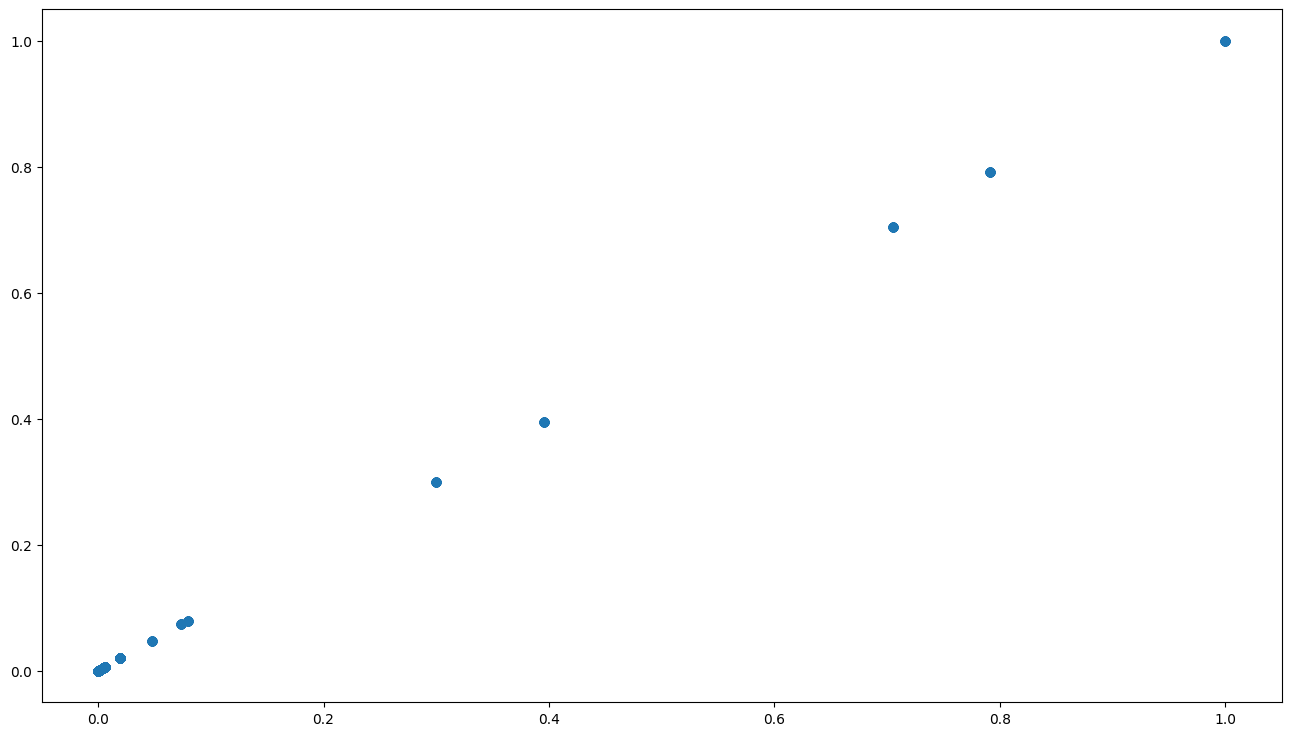

In [34]:
plt.figure(figsize=(16, 9))
plt.scatter(x='Usuarios', y='Capacidad_instalada', data=df_unificado)

In [ ]:
sns.pairplot(df_unificado)

In [ ]:
plt.figure(figsize=(24, 6))
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(x=df_unificado['potencia_m'], whis=3)

In [ ]:
plt.figure(figsize=(24, 6))
sns.boxplot(x=df_unificado['prom_diaria'])

In [ ]:
df_unificado.dtypes

In [ ]:
df_unificado.isnull().sum()

In [ ]:
df_unificado.shape

In [ ]:
#data['Tipo'] = pd.get_dummies(data['Tipo'])

In [ ]:
#correlcion
correlacion3 = data[[	'Usuarios',	'Capacidad_instalada',	'Energía_p',	'Energía_no_renovable',	'potencia_m',	'prom_diaria',	'energia_activa',	'energia_reactiva']].corr()
sns.heatmap(correlacion3, annot=True, cmap='coolwarm')


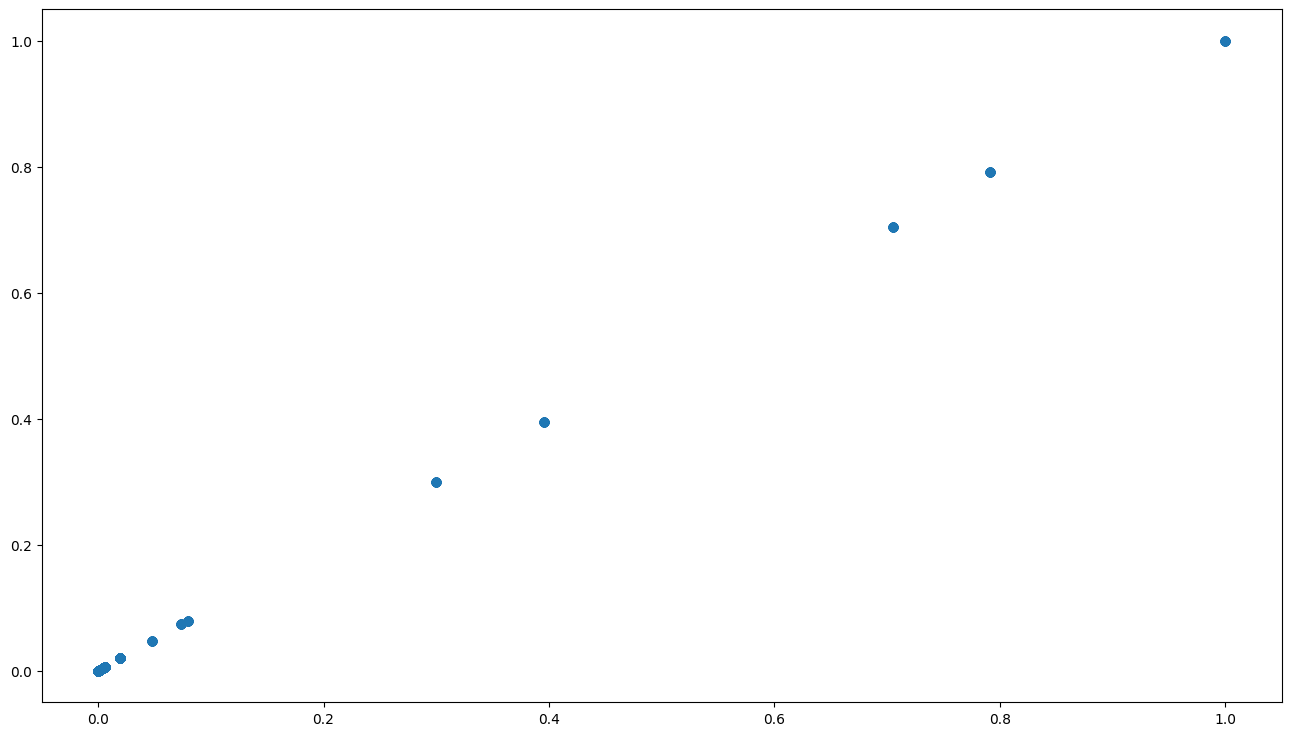

In [37]:
plt.figure(figsize=(16, 9))
plt.scatter(x='Usuarios', y='Capacidad_instalada', data=df_unificado)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

df_unificado['potencial_renovable'] = np.where(df_unificado['Capacidad_instalada'] > 500, 1, 0)

X = df_unificado[['potencia_m', 'Capacidad_instalada', 'Tipo_0']]
y = df_unificado['potencial_renovable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


modelo1 = RandomForestClassifier()
modelo1.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [47]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(modelo1, X, y, cv=kfold)
print(classification_report(y_test, y_pred))
print(cross_val_scores)
print(cross_val_scores.mean())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1001

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001

[1. 1. 1. 1. 1.]
1.0


/home/usuario/Proyectos/talentoTech/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


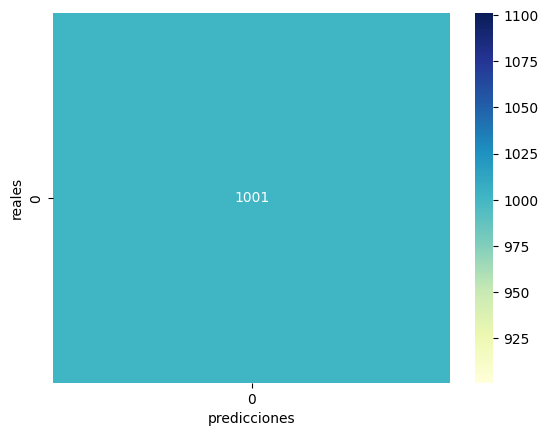

In [50]:
cm = confusion_matrix(y_test, y_pred)
labels = ['solar', 'eolico']
#cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(cm, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('predicciones')
plt.ylabel('reales')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
sns.boxplot(df_unificado['potencia_m'])

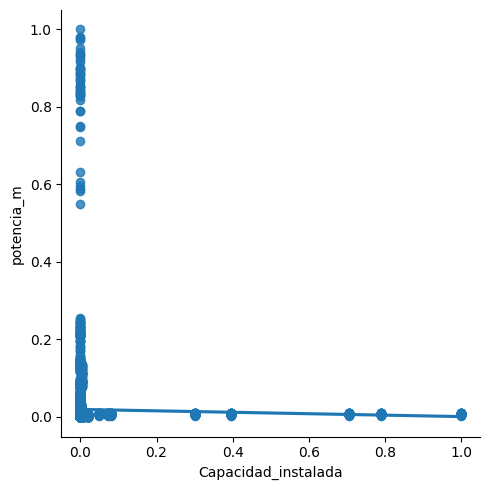

In [42]:
sns.lmplot(data=df_unificado, x='Capacidad_instalada', y='potencia_m')

In [ ]:
plt.figure(figsize=(24, 6))
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(x=df_unificado['potencia_m'], whis=3)

In [ ]:
plt.figure(figsize=(24, 6))
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(x=df_unificado['Capacidad_instalada'], whis=3)

In [ ]:
plt.figure(figsize=(24, 6))
sns.distplot(df_unificado['Capacidad_instalada'])
#

In [52]:
from scipy.stats.mstats import winsorize

potencia_winsorized = df_unificado['potencia_m'].copy()
y = winsorize(potencia_winsorized, limits=[0.05, 0.05])

Capacidad_winsorized = df_unificado['Capacidad_instalada'].copy()
z = winsorize(potencia_winsorized, limits=[0.05, 0.05])

diaria_winsorized = df_unificado['prom_diaria'].copy()
u = winsorize(potencia_winsorized, limits=[0.05, 0.05])

<Axes: >

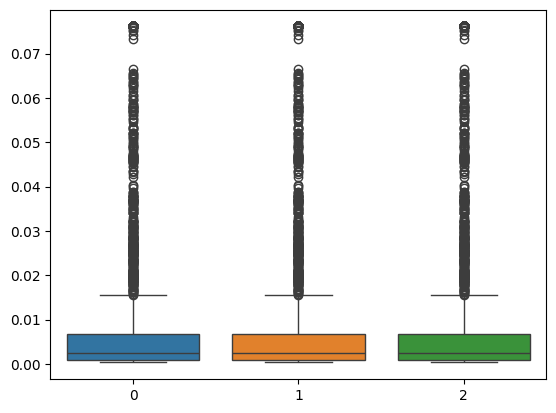

In [53]:
w = y, z, u
sns.boxplot(w)